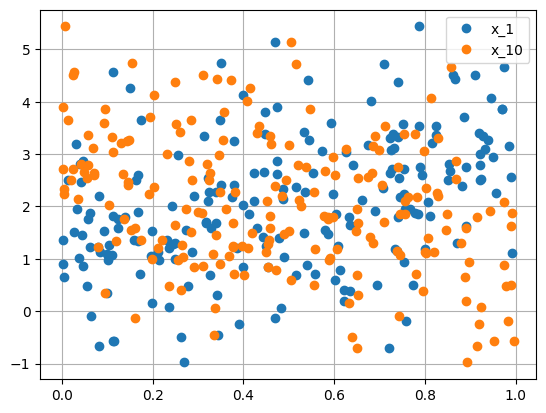

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# codes for i
x_list = np.random.uniform(size=[200,15], low=0, high=1)
epsilon = np.random.normal(loc=0, scale=1, size=200)
y_list, x1_list, x10_list = [], [], []
for i in range(200):
    x1_list.append(x_list[i][0])
    x10_list.append(x_list[i][9])
    y_list.append(1 + 1.7*x_list[i][0] + 1.2*x_list[i][1] +
                  0.8*x_list[i][5] - 1.5*x_list[i][9] + epsilon[i])

x1_list, x10_list, y_list = np.array(x1_list), np.array(x10_list), np.array(y_list)
plt.grid()
plt.plot(x1_list, y_list, 'o', label='x_1')
plt.plot(x10_list, y_list, 'o', label='x_10')
plt.legend(loc='best')
plt.show()

In [4]:
# codes for ii
X = sm.add_constant(x_list)
beta = np.array([1, 1.7, 1.2, 0, 0, 0, 0.8, 0, 0, 0, -1.5, 0, 0, 0, 0, 0])
model = sm.OLS(y_list, X)
result = model.fit()
y_hat = result.fittedvalues
y_bar = y_list.mean()
SSE, TSS, SSR = 0, 0, 0
for i in range(200):
    SSE += (y_list[i]-y_hat[i])**2
    SSR += (y_hat[i]-y_bar)**2
    TSS += (y_list[i]-y_bar)**2
R_square = SSR/TSS
n, p = 200, 15
error_variance = SSE/(n-(p+1))
print('The SSE is ', SSE)
print('The SSR is ', SSR)
print('The sum of SSE and SSR is ', SSE+SSR)
print('The TSS is ', TSS)
print('The R^2 is ', R_square)
print('The error variance is ', error_variance)

The SSE is  180.31657229890632
The SSR is  143.6178804006476
The sum of SSE and SSR is  323.93445269955396
The TSS is  323.93445269955384
The R^2 is  0.44335475650640915
The error variance is  0.9799813711897083


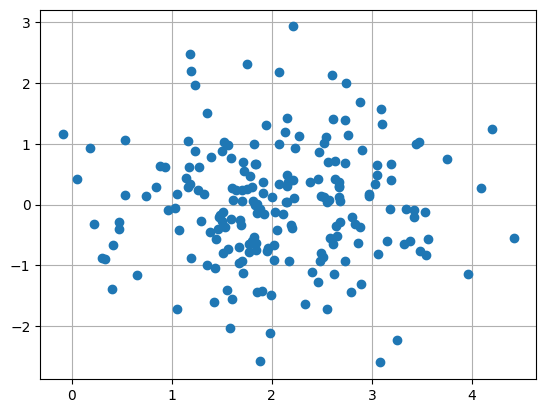

In [5]:
# codes for iii
epsilon_hat = []
for i in range(200):
    epsilon_hat.append(y_list[i] - y_hat[i])
plt.grid()
plt.plot(y_hat, epsilon_hat, 'o')
plt.show()

In [6]:
# codes for iv
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     9.770
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           8.73e-17
Time:                        19:04:09   Log-Likelihood:                -273.43
No. Observations:                 200   AIC:                             578.9
Df Residuals:                     184   BIC:                             631.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7423      0.515      1.441      0.1